In [1]:
from fin_statement_model.financial_statement import FinancialStatementGraph
import numpy as np

In [2]:
historical_periods = ["FY2020", "FY2021", "FY2022"]
forecast_periods = ["FY2023", "FY2024","FY2025"]

revenue_data = {"FY2020": 1000.0, "FY2021": 1100.0, "FY2022": 1210.0}
cogs_data = {p: revenue_data[p] * 0.4 for p in historical_periods}
opex_data = {p: revenue_data[p] * 0.2 for p in historical_periods}
interest_data = {p: 50.0 for p in historical_periods}
tax_data = {p: 0.1 for p in historical_periods}
net_income_data = {p: (revenue_data[p] - cogs_data[p] - opex_data[p] - interest_data[p] - tax_data[p])
                    for p in historical_periods}

In [3]:
#Intialize the graph
fsg = FinancialStatementGraph(periods=[*historical_periods, *forecast_periods])

##Add historical data
# Add financial statement items for each regional revenue
fsg.add_financial_statement_item("revenue_americas", revenue_data)
fsg.add_financial_statement_item("revenue_europe", revenue_data)
fsg.add_financial_statement_item("revenue_apac", revenue_data)

# Now define a calculation node for total revenue as the sum of these three
fsg.add_calculation("revenue", ["revenue_americas", "revenue_europe", "revenue_apac"], "addition")

fsg.add_financial_statement_item("cost_of_goods_sold", cogs_data)
fsg.add_financial_statement_item("operating_expenses", opex_data)
fsg.add_financial_statement_item("non_operating_income", interest_data)
fsg.add_financial_statement_item("non_operating_expenses", interest_data)

fsg.add_financial_statement_item("total_interest_expense", interest_data)
fsg.add_financial_statement_item("tax_expense", tax_data)

# For demonstration, assume these needed raw nodes exist or add dummy data
fsg.add_financial_statement_item("shares_outstanding", {"FY2020": 1000, "FY2021": 1000, "FY2022": 1000})
fsg.add_financial_statement_item("total_assets", {"FY2020": 5000, "FY2021": 5000, "FY2022": 5500})
fsg.add_financial_statement_item("total_equity", {"FY2020": 3000, "FY2021": 3000, "FY2022": 3200})

In [4]:
##Add forecasts
# Create curved growth forecast for Americas revenue
fsg.create_forecast("revenue_americas", "curve", "FY2022", forecast_periods, [0.05, 0.06,0.06])

# Create fixed growth forecasts for Europe and APAC revenue
fsg.create_forecast("revenue_europe", "fixed", "FY2022", forecast_periods, 0.05)
fsg.create_forecast("revenue_apac", "fixed", "FY2022", forecast_periods, 0.05)

fsg.create_forecast("cost_of_goods_sold", "statistical", "FY2022", forecast_periods, lambda: np.random.normal(0.05, 0.02) )

fsg.recalculate_all()

In [5]:
fsg.add_metric( "operating_income")
fsg.add_metric( "gross_profit")
fsg.add_metric( "ebit")
fsg.add_metric( "net_income")
fsg.add_metric( "gross_profit_margin")

In [6]:
print(fsg)

Financial Statement Graph Summary

Periods: FY2020, FY2021, FY2022, FY2023, FY2024, FY2025

Financial Statement Items:
-------------------------
• revenue_americas (w Forecasts)
• revenue_europe (w Forecasts)
• revenue_apac (w Forecasts)
• cost_of_goods_sold (w Forecasts)
• operating_expenses
• non_operating_income
• non_operating_expenses
• total_interest_expense
• tax_expense
• shares_outstanding
• total_assets
• total_equity

Calculations:
-------------------------
• revenue = f(revenue_americas, revenue_europe, revenue_apac)

Metrics:
-------------------------
• ebit
• gross_profit
• gross_profit_margin
• net_income
• operating_income
• pre_tax_income

Forecasted Items:
-------------------------
• cost_of_goods_sold (type: StatisticalGrow)
  Distribution: np.random.normal(0.05, 0.02) )
• revenue_americas (type: CurveGrowth)
  Growth curve: FY2023: 5.0%, FY2024: 6.0%, FY2025: 6.0%
• revenue_apac (type: FixedGrowth), growth rate: 5.0%
• revenue_europe (type: FixedGrowth), growth rate

In [7]:
df = fsg.to_dataframe()
df

,FY2020,FY2021,FY2022,FY2023,FY2024,FY2025
revenue_americas,1000.000000,1100.000000,1210.000000,1270.500000,1346.730000,1427.533800
revenue_europe,1000.000000,1100.000000,1210.000000,1270.500000,1334.025000,1400.726250
revenue_apac,1000.000000,1100.000000,1210.000000,1270.500000,1334.025000,1400.726250
revenue,3000.000000,3300.000000,3630.000000,3811.500000,4014.780000,4228.986300
cost_of_goods_sold,400.000000,440.000000,484.000000,496.746957,525.734756,544.275846
operating_expenses,200.000000,220.000000,242.000000,242.000000,242.000000,242.000000
non_operating_income,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
non_operating_expenses,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
total_interest_expense,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
tax_expense,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [8]:
df.pct_change(axis=1)

,FY2020,FY2021,FY2022,FY2023,FY2024,FY2025
revenue_americas,NaN,0.100000,0.100000,0.050000,0.060000,0.060000
revenue_europe,NaN,0.100000,0.100000,0.050000,0.050000,0.050000
revenue_apac,NaN,0.100000,0.100000,0.050000,0.050000,0.050000
revenue,NaN,0.100000,0.100000,0.050000,0.053333,0.053354
cost_of_goods_sold,NaN,0.100000,0.100000,0.026337,0.058355,0.035267
operating_expenses,NaN,0.100000,0.100000,0.000000,0.000000,0.000000
non_operating_income,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
non_operating_expenses,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
total_interest_expense,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
tax_expense,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: >

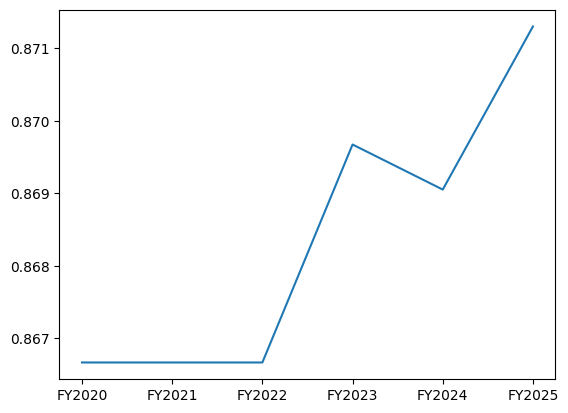

In [9]:
df.loc["gross_profit_margin",:].plot()
